In [1]:
import tweepy
import json
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import os
import time
import sys
from tweepy import OAuthHandler
from tweepy import Stream, Cursor
from tweepy.streaming import StreamListener
from random import sample

In [2]:
path = '../Desktop/AssignmentSMC/'

### Peak Time of Mentions Per Day

In [3]:
mentions = pd.read_csv('hulu_mentions.csv')
mentions.head()

/Users/amirahanisadlin/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (8,14,15,17,18,19,21,22,25,26,27,31,32,33,34,35,40,41,46,49,50,51) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,created_at,id,id_str,text,truncated,entities,extended_entities,metadata,source,in_reply_to_status_id,...,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51
0,2021-02-09 23:59:45+00:00,1.360000e+18,1.360000e+18,@p_yelvington @disneyplus @hulu https://t.co/I...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 1359290916368973824, 'id_str...","{'iso_language_code': 'und', 'result_type': 'r...","<a href=""http://twitter.com/download/iphone"" r...",1.360000e+18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-02-09 23:59:14+00:00,1.360000e+18,1.360000e+18,@Tavalani3 @Disney @hulu @Bayer @SlimFast @McD...,True,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",1.360000e+18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021-02-09 23:59:02+00:00,1.360000e+18,1.360000e+18,@Cubs @SloanParkMesa @WatchMarquee and @hulu t...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",1.360000e+18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021-02-09 23:58:21+00:00,1.360000e+18,1.360000e+18,THIS is Why We Fight!!!!!!!!!\n\nSo Who Will B...,True,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2021-02-09 23:58:19+00:00,1.360000e+18,1.360000e+18,@JBiddy19 @REWorldofMagic @alexsaa_mariee @hul...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",1.360000e+18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
mentions.iloc[0].id

1.36e+18

In [5]:
mentions['created_at'] = pd.to_datetime(mentions['created_at'])
mentions.head()

,created_at,id,id_str,text,truncated,entities,extended_entities,metadata,source,in_reply_to_status_id,...,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51
0,2021-02-09 23:59:45+00:00,1.360000e+18,1.360000e+18,@p_yelvington @disneyplus @hulu https://t.co/I...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 1359290916368973824, 'id_str...","{'iso_language_code': 'und', 'result_type': 'r...","<a href=""http://twitter.com/download/iphone"" r...",1.360000e+18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-02-09 23:59:14+00:00,1.360000e+18,1.360000e+18,@Tavalani3 @Disney @hulu @Bayer @SlimFast @McD...,True,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",1.360000e+18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021-02-09 23:59:02+00:00,1.360000e+18,1.360000e+18,@Cubs @SloanParkMesa @WatchMarquee and @hulu t...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",1.360000e+18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021-02-09 23:58:21+00:00,1.360000e+18,1.360000e+18,THIS is Why We Fight!!!!!!!!!\n\nSo Who Will B...,True,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2021-02-09 23:58:19+00:00,1.360000e+18,1.360000e+18,@JBiddy19 @REWorldofMagic @alexsaa_mariee @hul...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",1.360000e+18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
mentions[~mentions['Unnamed: 29'].isna()]
mentions.drop([24817], inplace=True)
mentions.drop(columns=['Unnamed: 29', 'Unnamed: 30', 'Unnamed: 31', 'Unnamed: 32', 'Unnamed: 33', 
                       'Unnamed: 34', 'Unnamed: 35', 'Unnamed: 36', 'Unnamed: 37', 'Unnamed: 38', 
                       'Unnamed: 39', 'Unnamed: 40', 'Unnamed: 41', 'Unnamed: 42', 'Unnamed: 43',
                       'Unnamed: 44', 'Unnamed: 45', 'Unnamed: 46', 'Unnamed: 47', 'Unnamed: 48', 
                       'Unnamed: 49', 'Unnamed: 50', 'Unnamed: 51'], inplace=True)

In [7]:
mentions.to_csv(r'hulu_mentions2a.csv', index=None, mode='a', header=True)

In [8]:
bins = [0, 6, 12, 16, 20, 24]
labels = ['Midnight', 'Morning', 'Noon', 'Evening', 'Night']

mentions['time_bin'] = pd.cut(mentions['created_at'].dt.hour, bins, labels=labels, right=False)
# mentions.info()
# mentions

In [9]:
count_mentions = mentions['time_bin'].value_counts().rename_axis('time_bin').to_frame('counts')
count_mentions

,counts
time_bin,
Night,10507
Midnight,10142
Evening,6449
Noon,3851
Morning,2952


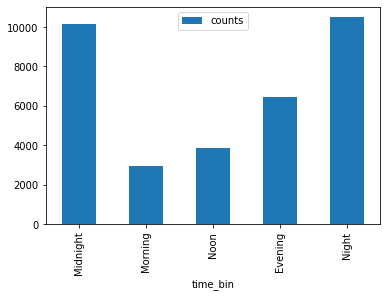

In [10]:
count_mentions.sort_values(by=['time_bin'], ascending=True, inplace=True)
count_mentions.plot.bar()

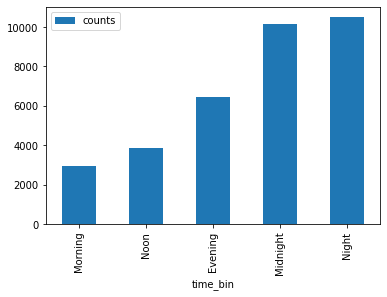

In [11]:
count_mentions.sort_values(by=['counts'], ascending=True, inplace=True)
count_mentions.plot.bar()

### Tweets

In [100]:
tweets = pd.read_csv('hulu_tweets2a.csv')
tweets.sort_values(by=['created_at'], ascending=True, inplace=True)
tweets = tweets.reset_index(drop=True)
tweets.head()

,created_at,id,id_str,text,truncated,entities,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,...,retweet_count,favorite_count,favorited,retweeted,lang,extended_entities,possibly_sensitive,quoted_status_id,quoted_status_id_str,quoted_status
0,2021-02-09 18:50:30+00:00,1359213098142363650,1359213098142363648,@mindykaling nods head. eats weight in pizza. ...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""https://mobile.twitter.com"" rel=""nofo...",1.359192e+18,1.359192e+18,2.354460e+07,...,1,45,False,False,en,"{'media': [{'id': 1359213048406310914, 'id_str...",0.0,NaN,NaN,NaN
1,2021-02-09 19:11:34+00:00,1359218401898500096,1359218401898500096,@FXNetworks @CakeFX i'll be having my cake and...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""https://mobile.twitter.com"" rel=""nofo...",1.359204e+18,1.359204e+18,1.642196e+07,...,1,6,False,False,en,NaN,NaN,NaN,NaN,NaN
2,2021-02-09 19:11:46+00:00,1359218453354192898,1359218453354192896,@MakwenaMatjila if you know what's good for you,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""https://mobile.twitter.com"" rel=""nofo...",1.359208e+18,1.359208e+18,1.043889e+18,...,0,1,False,False,en,NaN,NaN,NaN,NaN,NaN
3,2021-02-09 19:11:59+00:00,1359218505447473153,1359218505447473152,@Jessmocha_ rewatch,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""https://mobile.twitter.com"" rel=""nofo...",1.359207e+18,1.359207e+18,8.050774e+17,...,0,0,False,False,en,NaN,NaN,NaN,NaN,NaN
4,2021-02-09 19:12:11+00:00,1359218555732959232,1359218555732959232,@bigkiddman enjoy fam!,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""https://mobile.twitter.com"" rel=""nofo...",1.359206e+18,1.359206e+18,3.938953e+08,...,0,1,False,False,en,NaN,NaN,NaN,NaN,NaN


In [101]:
tweets['created_at'] = pd.to_datetime(tweets['created_at'])
#tweets.info()

In [102]:
bins = [0, 6, 12, 16, 20, 24]
labels = ['Midnight', 'Morning', 'Noon', 'Evening', 'Night']

tweets['time_bin'] = pd.cut(tweets['created_at'].dt.hour, bins, labels=labels, right=False)
tweets.head()

,created_at,id,id_str,text,truncated,entities,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,...,favorite_count,favorited,retweeted,lang,extended_entities,possibly_sensitive,quoted_status_id,quoted_status_id_str,quoted_status,time_bin
0,2021-02-09 18:50:30+00:00,1359213098142363650,1359213098142363648,@mindykaling nods head. eats weight in pizza. ...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""https://mobile.twitter.com"" rel=""nofo...",1.359192e+18,1.359192e+18,2.354460e+07,...,45,False,False,en,"{'media': [{'id': 1359213048406310914, 'id_str...",0.0,NaN,NaN,NaN,Evening
1,2021-02-09 19:11:34+00:00,1359218401898500096,1359218401898500096,@FXNetworks @CakeFX i'll be having my cake and...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""https://mobile.twitter.com"" rel=""nofo...",1.359204e+18,1.359204e+18,1.642196e+07,...,6,False,False,en,NaN,NaN,NaN,NaN,NaN,Evening
2,2021-02-09 19:11:46+00:00,1359218453354192898,1359218453354192896,@MakwenaMatjila if you know what's good for you,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""https://mobile.twitter.com"" rel=""nofo...",1.359208e+18,1.359208e+18,1.043889e+18,...,1,False,False,en,NaN,NaN,NaN,NaN,NaN,Evening
3,2021-02-09 19:11:59+00:00,1359218505447473153,1359218505447473152,@Jessmocha_ rewatch,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""https://mobile.twitter.com"" rel=""nofo...",1.359207e+18,1.359207e+18,8.050774e+17,...,0,False,False,en,NaN,NaN,NaN,NaN,NaN,Evening
4,2021-02-09 19:12:11+00:00,1359218555732959232,1359218555732959232,@bigkiddman enjoy fam!,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""https://mobile.twitter.com"" rel=""nofo...",1.359206e+18,1.359206e+18,3.938953e+08,...,1,False,False,en,NaN,NaN,NaN,NaN,NaN,Evening


In [103]:
count_tweets = tweets['time_bin'].value_counts().rename_axis('time_bin').to_frame('counts')
count_tweets

,counts
time_bin,
Midnight,333
Evening,313
Night,155
Noon,1
Morning,0


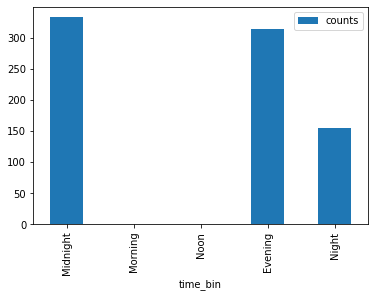

In [104]:
count_tweets.sort_values(by=['time_bin'], ascending=True, inplace=True)
count_tweets.plot.bar()

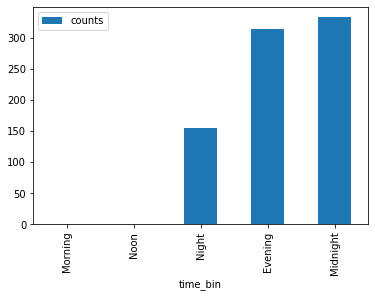

In [105]:
count_tweets.sort_values(by=['counts'], ascending=True, inplace=True)
count_tweets.plot.bar()

In [108]:
# tweets2 = tweets2[tweets2['created_at'] < '2021-02-24']
# tweets2 = tweets2.reset_index(drop=True)
# tweets2.to_csv(r'hulu_tweets2a.csv', index=None, mode='a', header=True)
# tweets2.to_json(r'hulu_tweets2a.json')
# tweets2

### Hashtags

In [83]:
tweets2['entities']

0      {'hashtags': [], 'symbols': [], 'user_mentions...
1      {'hashtags': [], 'symbols': [], 'user_mentions...
2      {'hashtags': [], 'symbols': [], 'user_mentions...
3      {'hashtags': [], 'symbols': [], 'user_mentions...
4      {'hashtags': [], 'symbols': [], 'user_mentions...
                             ...                        
797    {'hashtags': [], 'symbols': [], 'user_mentions...
798    {'hashtags': [], 'symbols': [], 'user_mentions...
799    {'hashtags': [], 'symbols': [], 'user_mentions...
800    {'hashtags': [], 'symbols': [], 'user_mentions...
801    {'hashtags': [], 'symbols': [], 'user_mentions...
Name: entities, Length: 802, dtype: object

In [109]:
hashtaglist = []
for obj in tweets['entities']:
    split = obj.split(']')
    split2= split[0].split('[')
    split3 = split2[1]
    if 'text' in split3:
        split4 = split3.split(':')
        split4 = split4[1].split(',')
        split5 = split4[0].replace('"', "")
        split5 = split5.replace("'", "")
        hashtaglist.append(split5)
        
hashtag = pd.Series(hashtaglist)
hashtag.value_counts()

 YourAttentionPlease     8
 kid90                   3
 FramingBritneySpears    3
 BlackHistoryMonth       2
 Cheers                  2
 NCAAB                   2
 NMDLND                  2
 StreamingOnlyOnHulu     1
 IntoTheDark             1
 BossLevel               1
 PalmSprings             1
 SinglesAwarenessDay     1
 AskSnowfall             1
 jannonhulu              1
 lifeisunfair            1
 Hulu                    1
 superstore              1
 SolarOpposites          1
 ShrillOnHulu            1
 NOMADLAND               1
 hulu                    1
 SnowfallFX              1
 TheRookie               1
 QUEENSUGAR              1
 venji                   1
 SNL                     1
 SisterSister            1
 ModernFamily            1
 nospoilers              1
 thegreatnorth           1
 QueenSugar              1
 grownish                1
 NationalDrinkWineDay    1
 CollegeHill             1
 PancakeDay              1
 Nomadland               1
 Scandal                 1
 